### Heatmap

This notebook generates de heatmap of distances among the survey users. 

- Create KNN model
- Function to calculate distance
- Compare Euclidean vs Cosine distance in the sample

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)

# for plotting, not truly used in this notebook
import matplotlib.pyplot as plt
import seaborn as sns


#model to calculate the closest neighbourgh
from sklearn.neighbors import NearestNeighbors 

#compress sparse table for more efficient computation
from scipy.sparse import csr_matrix

### import

In [2]:
path = "../data/"
file = "survey_matrix.csv"

survey_matrix = pd.read_csv(path+file)

In [3]:
survey_matrix = survey_matrix.set_index(survey_matrix["userId"]).drop(columns="userId")

### Build distance calculator

#### modeling the closest neighbor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

In [4]:
# create model, based on the cosine distance
model_knn = NearestNeighbors(metric="euclidean",
                             algorithm="brute",
                             n_jobs=-1)

# create a compress table of movie_features, probably not necessary with this volume of data
mat_survey_feat = csr_matrix(survey_matrix)
mat_survey_feat

<41x98 sparse matrix of type '<class 'numpy.float64'>'
	with 1730 stored elements in Compressed Sparse Row format>

In [5]:
# fit the matrix in the model
model_knn.fit(mat_survey_feat)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=-1, n_neighbors=5, p=2, radius=1.0)

In [6]:
# the hardcore code is:
# model_knn.kneighbors(user_features.loc[4].values.reshape(1,-1), n_neighbors=6)
# we can check the 

user_example = survey_matrix.iloc[10].values.reshape(1,-1)
# we use iloc because the userId is not continue, 
# used iloc to avoid annoying error messages
# it is necessary to create a user_list for identify the right userId

model_knn.kneighbors(user_example, n_neighbors=len(survey_matrix))

# result is a tuple of array, first get the distance, second the id

(array([[ 0.        , 18.13835715, 18.24828759, 19.        , 19.18332609,
         19.49358869, 19.92485885, 19.94993734, 20.1246118 , 20.24845673,
         20.32240143, 20.83266666, 20.85665361, 20.92844954, 21.58703314,
         21.9089023 , 21.9544984 , 22.5166605 , 23.10844002, 23.13006701,
         23.91652149, 23.97915762, 24.2693222 , 24.49489743, 24.67792536,
         25.01999201, 25.05992817, 25.61249695, 25.74878638, 26.30589288,
         26.47640459, 26.60826939, 26.83281573, 28.03569154, 28.19574436,
         28.3019434 , 28.51315486, 29.05167809, 29.9833287 , 30.        ,
         30.8058436 ]]),
 array([[10,  8,  7, 14, 31, 33, 30, 36, 17, 27, 15, 34, 19,  3, 13, 21,
          1,  5,  4, 28, 23,  2, 12,  9, 37, 32, 24, 29, 20, 18, 38, 26,
         25, 40,  6, 39,  0, 16, 35, 22, 11]]))

In [7]:
# Calculate distances with every element in an array
# - survey_feat
# - mat_survey_feat

def get_distances(survey_feat, user_pos):
    user_example = survey_feat.iloc[user_pos].values.reshape(1,-1)
    return model_knn.kneighbors(user_example, n_neighbors=len(survey_matrix))

In [8]:
# check distances calculation of the second row
get_distances (survey_matrix, 1)

(array([[ 0.        , 21.58703314, 21.9089023 , 21.9544984 , 22.15851981,
         22.49444376, 22.53885534, 22.58317958, 23.10844002, 23.2594067 ,
         23.47338919, 23.8117618 , 24.2693222 , 24.39262184, 24.49489743,
         24.69817807, 24.91987159, 24.97999199, 25.47547841, 25.63201124,
         25.72936066, 25.94224354, 25.98076211, 26.21068484, 26.30589288,
         26.4952826 , 26.4952826 , 26.62705391, 26.94438717, 27.        ,
         27.27636339, 27.71281292, 28.03569154, 30.18277655, 30.18277655,
         30.21588986, 31.20897307, 31.55946768, 31.84336666, 32.07802986,
         32.78719262]]),
 array([[ 1, 23,  3, 10,  7, 34, 31, 27, 33, 28, 30,  5, 14, 19, 13, 29,
          8, 36,  2, 15, 25, 38, 12, 37, 32,  9,  4, 20, 21, 17, 18, 24,
         40, 35,  0, 11, 22, 26, 16, 39,  6]]))

In [9]:
# loop to get every distance 
for i in range(len(survey_matrix.index)):
    print(get_distances(survey_matrix, i))

(array([[ 0.        , 23.76972865, 24.71841419, 24.73863375, 25.78759392,
        26.05762844, 26.0959767 , 26.15339366, 26.34387974, 26.5894716 ,
        26.72077843, 26.73948391, 26.75817632, 26.92582404, 27.01851217,
        27.05549852, 27.09243437, 27.49545417, 27.78488798, 27.80287755,
        27.83882181, 27.85677655, 28.01785145, 28.12472222, 28.16025568,
        28.19574436, 28.23118843, 28.37252192, 28.42534081, 28.51315486,
        28.70540019, 28.98275349, 29.        , 29.10326442, 29.24038303,
        29.29163703, 29.96664813, 30.18277655, 30.18277655, 30.19933774,
        31.17691454]]), array([[ 0, 21, 36, 19, 24, 16,  3,  5, 39, 26, 38, 33,  8,  9,  2, 30,
        37, 17,  7, 18, 40, 35, 13, 22, 34, 31, 32, 23, 14, 10, 15,  6,
        27, 25, 29, 20, 12,  4,  1, 11, 28]]))
(array([[ 0.        , 21.58703314, 21.9089023 , 21.9544984 , 22.15851981,
        22.49444376, 22.53885534, 22.58317958, 23.10844002, 23.2594067 ,
        23.47338919, 23.8117618 , 24.2693222 , 24.392

(array([[ 0.        , 21.37755833, 22.60530911, 22.60530911, 23.36664289,
        23.97915762, 24.04163056, 24.16609195, 24.2693222 , 24.39262184,
        24.49489743, 24.51530134, 24.51530134, 24.53568829, 24.57641145,
        24.63736999, 24.75883681, 24.8394847 , 24.93992783, 25.15949125,
        25.17935662, 25.53429067, 25.82634314, 25.94224354, 25.98076211,
        26.03843313, 26.43860813, 26.83281573, 26.88865932, 27.12931993,
        27.23967694, 27.47726333, 29.52964612, 29.68164416, 29.78254522,
        29.96664813, 30.16620626, 30.6757233 , 30.95157508, 32.51153641,
        32.984845  ]]), array([[12,  3, 27, 33, 14,  9, 30, 38, 10, 13,  2, 29, 25,  5,  8, 21,
        23, 34, 28, 36,  7, 37, 18, 31,  1, 20, 24, 17,  4, 15, 19, 32,
        35, 40, 22,  0, 11, 26, 39, 16,  6]]))
(array([[ 0.        , 19.92485885, 20.76053949, 21.1896201 , 21.44761059,
        21.58703314, 21.58703314, 22.22611077, 22.49444376, 23.34523506,
        23.68543856, 23.70653918, 23.79075451, 24.310

(array([[ 0.        , 20.39607805, 21.14237451, 21.58703314, 21.70253441,
        22.        , 22.27105745, 22.42766149, 22.84731932, 22.97825059,
        23.57965225, 23.60084744, 23.70653918, 23.76972865, 24.08318916,
        24.18677324, 24.22808288, 24.33105012, 24.63736999, 24.71841419,
        24.73863375, 24.93992783, 25.05992817, 25.29822128, 25.55386468,
        25.67099531, 25.78759392, 25.86503431, 25.88435821, 26.15339366,
        26.43860813, 26.77685568, 27.01851217, 27.20294102, 27.44084547,
        27.71281292, 27.73084925, 27.74887385, 28.08914381, 28.44292531,
        28.56571371]]), array([[24, 22, 37, 18, 39, 32, 25,  2, 29, 40, 36,  8, 21, 38, 23,  6,
        11, 33, 35, 20,  9,  3, 10, 26, 17, 19,  0, 30, 16, 31, 12,  5,
        13, 34, 14,  1,  7,  4, 15, 28, 27]]))
(array([[ 0.        , 21.28379665, 21.30727575, 22.22611077, 22.27105745,
        23.32380758, 24.08318916, 24.24871131, 24.35159132, 24.37211521,
        24.51530134, 24.65765601, 25.27844932, 25.416

(array([[ 0.        , 19.94993734, 20.04993766, 21.11871208, 21.9317122 ,
        21.97726098, 22.18107301, 22.5166605 , 22.627417  , 22.71563338,
        22.8035085 , 22.93468988, 22.95648057, 23.34523506, 23.34523506,
        23.51595203, 23.57965225, 24.04163056, 24.22808288, 24.51530134,
        24.71841419, 24.71841419, 24.97999199, 24.97999199, 25.        ,
        25.15949125, 25.21904043, 25.29822128, 25.3179778 , 25.65151068,
        25.78759392, 25.88435821, 26.07680962, 26.17250466, 26.30589288,
        26.62705391, 27.23967694, 27.5317998 , 27.58622845, 27.78488798,
        28.65309756]]), array([[36, 10, 21, 33,  8, 30, 31, 14,  3,  9, 34, 23, 20,  7, 17,  2,
        24, 32, 37, 19,  0, 15, 13,  1,  5, 12, 40,  4, 38, 27, 28, 26,
        29, 39, 18,  6, 16, 22, 35, 25, 11]]))
(array([[ 0.        , 21.14237451, 22.11334439, 22.38302929, 23.43074903,
        23.76972865, 23.91652149, 24.22808288, 24.37211521, 24.45403852,
        24.4744765 , 24.55605832, 24.67792536, 24.859

In [10]:
# every result can be stored into a dictionary
dist, indx = get_distances (survey_matrix, 1)
recommendations = dict(zip(indx.flatten(), dist.flatten()))
recommendations

{1: 0.0,
 23: 21.587033144922902,
 3: 21.908902300206645,
 10: 21.95449840010015,
 7: 22.15851980616034,
 34: 22.494443758403985,
 31: 22.538855339169288,
 27: 22.58317958127243,
 33: 23.108440016582687,
 28: 23.259406699226016,
 30: 23.473389188611005,
 5: 23.811761799581316,
 14: 24.269322199023193,
 19: 24.392621835300936,
 13: 24.49489742783178,
 29: 24.698178070456937,
 8: 24.919871588754223,
 36: 24.979991993593593,
 2: 25.475478405713993,
 15: 25.632011235952593,
 25: 25.729360660537214,
 38: 25.942243542145693,
 12: 25.98076211353316,
 37: 26.210684844162312,
 32: 26.30589287593181,
 9: 26.49528259898354,
 4: 26.49528259898354,
 20: 26.627053911388696,
 21: 26.94438717061496,
 17: 27.0,
 18: 27.27636339397171,
 24: 27.712812921102035,
 40: 28.035691537752374,
 35: 30.18277654557314,
 0: 30.18277654557314,
 11: 30.215889859476256,
 22: 31.20897306865447,
 26: 31.559467676119,
 16: 31.843366656181317,
 39: 32.07802986469088,
 6: 32.78719262151}

In [11]:
# create list of dictionaries with all the distances
heatmap = []
for i in range(len(survey_matrix.index)):
    dist, indx = get_distances (survey_matrix, i)
    distx = dict(zip(indx.flatten(), dist.flatten()))
    heatmap.append(distx)

In [12]:
# create a list which is a range of all the user positions on the matrix
heatmap_columns = list(range(len(survey_matrix)))

# create a square dataframe with those values as columns
heatmap_df = pd.DataFrame(heatmap)[heatmap_columns]

In [13]:
heatmap_np = heatmap_df.to_numpy()


In [14]:
minval = np.min(heatmap_np[np.nonzero(heatmap_np)])
maxval = np.max(heatmap_np[np.nonzero(heatmap_np)])
maxval

34.583232931581165

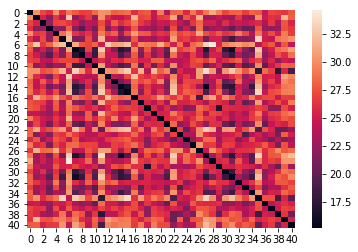

In [15]:
# plot heatmap
ax = sns.heatmap(heatmap_df, vmin=minval, vmax=maxval)

In [16]:
heatmap_df["userId"] = list(survey_matrix.index)

In [17]:
users_dict = dict(zip(range(len(heatmap_df)), list(survey_matrix.index)))
users_dict

{0: 'Tessa',
 1: 'Mano',
 2: 'olivia',
 3: 'Seno',
 4: 'Sujit',
 5: 'Unknown',
 6: 'brecht',
 7: 'Can',
 8: 'Valerie',
 9: 'Adam Driver',
 10: 'Alex',
 11: 'me',
 12: 'June',
 13: 'Max',
 14: 'Mandy',
 15: 'Tobias',
 16: 'em',
 17: 'Dani',
 18: 'Pantareimadrid',
 19: 'tove',
 20: 'Elsa',
 21: 'lea dicaprio',
 22: 'Cuanina',
 23: 'Alex Tester',
 24: 'Carmen Maura',
 25: 'Carstencito',
 26: 'Mag',
 27: 'Arne',
 28: 'Kosta',
 29: 'Chespirito',
 30: 'Marcel',
 31: 'Flac',
 32: 'yai',
 33: 'Totoro',
 34: 'John Sample',
 35: 'Wim Wenders',
 36: 'Isabel',
 37: 'Julie',
 38: 'Tony Stark',
 39: 'Hilko',
 40: 'Yoana'}

In [18]:
heatmap_names = heatmap_df.set_index("userId").rename(columns=users_dict)
del heatmap_names.index.name

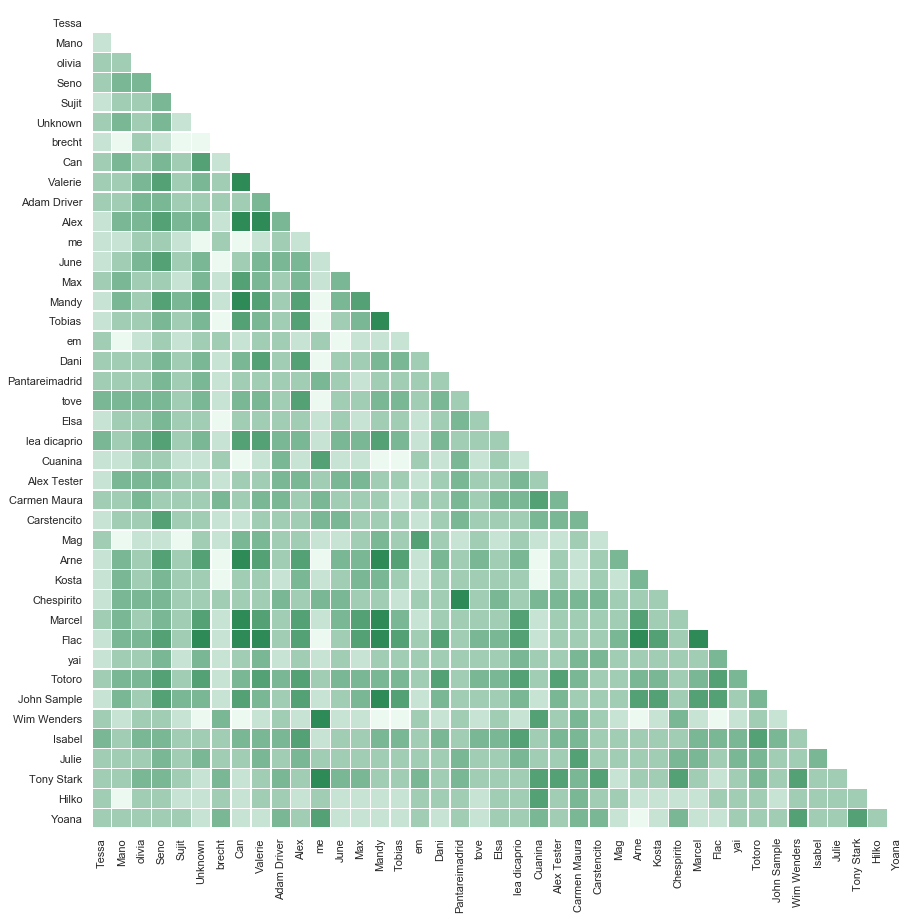

In [19]:
# plot heatmap
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(heatmap_names, dtype=np.bool))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.light_palette("seagreen", reverse=True)
# sns.palplot(sns.light_palette("seagreen", reverse=True))
ax = sns.heatmap(heatmap_names
                 ,mask=mask
                 ,cmap=cmap
                 ,vmin=15
                 ,vmax=maxval
                 ,square=True
                 ,linewidths=.5
                 ,cbar_kws={"shrink": .5}
                 ,cbar=False)



http://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [20]:
heatmap_names

,Tessa,Mano,olivia,Seno,Sujit,Unknown,brecht,Can,Valerie,Adam Driver,...,Flac,yai,Totoro,John Sample,Wim Wenders,Isabel,Julie,Tony Stark,Hilko,Yoana
Tessa,0.000000,30.182777,27.018512,26.095977,30.182777,26.153394,28.982753,27.784888,26.758176,26.925824,...,28.195744,28.231188,26.739484,28.160256,27.856777,24.718414,27.092434,26.720778,26.343880,27.838822
Mano,30.182777,0.000000,25.475478,21.908902,26.495283,23.811762,32.787193,22.158520,24.919872,26.495283,...,22.538855,26.305893,23.108440,22.494444,30.182777,24.979992,26.210685,25.942244,32.078030,28.035692
olivia,27.018512,25.475478,0.000000,22.472205,26.925824,27.202941,26.419690,24.979992,22.271057,24.310492,...,24.186773,24.919872,24.392622,25.199206,25.806976,23.515952,26.419690,23.622024,27.640550,25.514702
Seno,26.095977,21.908902,22.472205,0.000000,22.583180,22.293497,28.089144,21.748563,19.364917,24.000000,...,19.949937,22.494444,20.445048,20.736441,27.658633,22.627417,22.383029,22.737634,27.549955,26.608269
Sujit,30.182777,26.495283,26.925824,22.583180,0.000000,28.618176,31.320920,26.286879,25.238859,26.305893,...,26.832816,29.223278,27.092434,23.706539,29.000000,25.298221,27.331301,25.238859,29.240383,26.645825
Unknown,26.153394,23.811762,27.202941,22.293497,28.618176,0.000000,32.280025,21.307276,21.587033,27.184554,...,18.248288,21.931712,21.517435,22.649503,33.406586,25.000000,24.454039,28.913665,29.427878,30.315013
brecht,28.982753,32.787193,26.419690,28.089144,31.320920,32.280025,0.000000,31.208973,27.568098,27.073973,...,30.282008,30.805844,29.883106,30.643107,24.331050,26.627054,27.784888,23.958297,27.676705,24.392622
Can,27.784888,22.158520,24.979992,21.748563,26.286879,21.307276,31.208973,0.000000,17.029386,26.962938,...,16.093477,26.019224,21.886069,19.672316,32.893768,23.345235,25.337719,28.530685,29.325757,30.838288
Valerie,26.758176,24.919872,22.271057,19.364917,25.238859,21.587033,27.568098,17.029386,0.000000,24.186773,...,17.916473,23.685439,20.760539,21.931712,31.304952,21.931712,24.372115,27.568098,25.884358,28.687977
Adam Driver,26.925824,26.495283,24.310492,24.000000,26.305893,27.184554,27.073973,26.962938,24.186773,0.000000,...,27.166155,28.178006,22.847319,25.806976,27.221315,22.715633,25.787594,22.293497,25.039968,24.413111


In [21]:
ironhackers = ["Tessa",
               "Mano",
               "olivia",
               "Seno",
               "Sujit",
               "Unknown",
               "brecht",
               "Can",
               "Valerie",
               "Adam Driver",
               "Alex",
               "me",
               "June",
               "Max",
               "Mandy",
               "Tobias",
               "em",
               "Dani",
               "Arne",
               "Kosta",
               "Wim Wenders"]

In [22]:
heatmap_ironhackers = heatmap_names[ironhackers].loc[ironhackers]

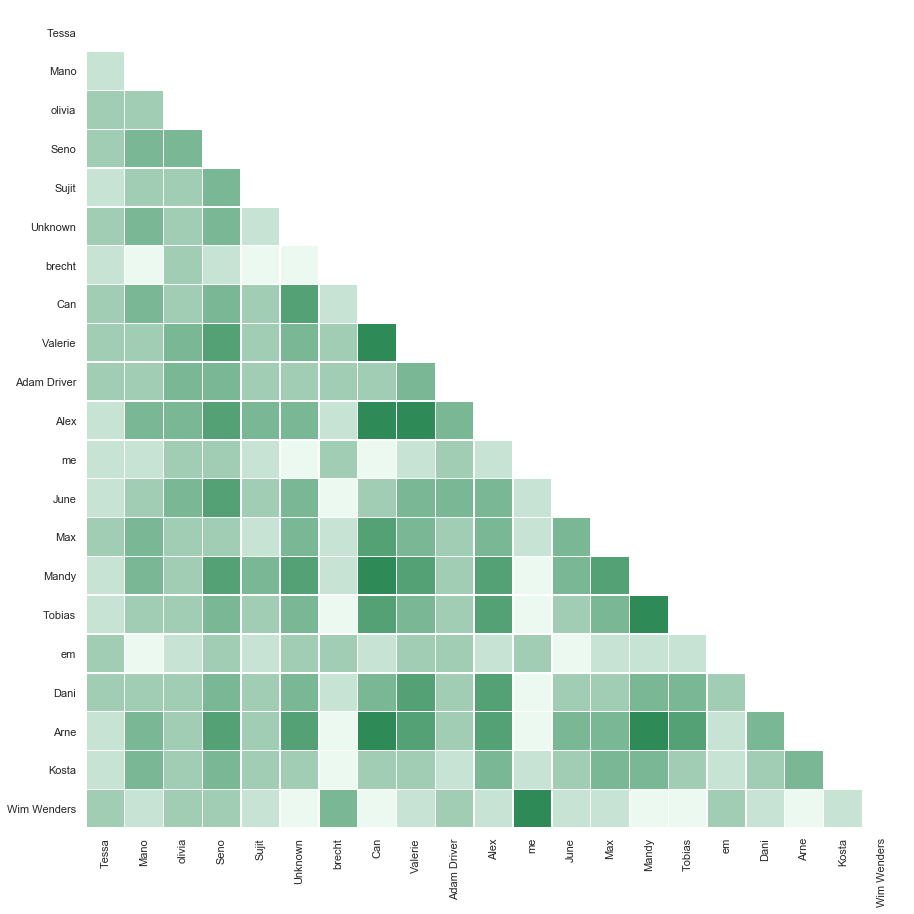

In [23]:
# plot heatmap
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(heatmap_ironhackers, dtype=np.bool))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.light_palette("seagreen", reverse=True)
# sns.palplot(sns.light_palette("seagreen", reverse=True))
ax = sns.heatmap(heatmap_ironhackers
                 ,mask=mask
                 ,cmap=cmap
                 ,vmin=15
                 ,vmax=maxval
                 ,square=True
                 ,linewidths=.5
                 ,cbar_kws={"shrink": .5}
                 ,cbar=False)

